In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
import subprocess as sp
from shapely import wkt
import seaborn as sns

In [2]:
sns.set()

# ++++++++++++++++++++++++++++++++++++++++++++++++
# DATE LIST
# ++++++++++++++++++++++++++++++++++++++++++++++++

In [22]:
date_list = pd.read_csv('date_list.csv')
date_list.head()

,Date
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [23]:
date_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 1 columns):
Date    83 non-null object
dtypes: object(1)
memory usage: 792.0+ bytes


In [24]:
# date_list.Date = pd.to_datetime(date_list.Date)
# date_list.info()

In [46]:
print(date_list.loc[date_list.Date == '2020-01-22'])
print(date_list.loc[date_list.Date == '2020-02-20'])
print(date_list.loc[date_list.Date == '2020-03-20'])
print(date_list.loc[date_list.Date == '2020-04-13'])

         Date
0  2020-01-22
          Date
29  2020-02-20
          Date
58  2020-03-20
          Date
82  2020-04-13


In [47]:
# date_list_test = date_list.iloc[[0]]
date_list_test = date_list.iloc[[0, 29, 58, 82]]

In [48]:
date_list_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 82
Data columns (total 1 columns):
Date    4 non-null object
dtypes: object(1)
memory usage: 64.0+ bytes


In [49]:
date_list_test.reset_index(drop=True, inplace=True)
date_list_test.head()

,Date
0,2020-01-22
1,2020-02-20
2,2020-03-20
3,2020-04-13


# ++++++++++++++++++++++++++++++++++++++++++++++++
# CORONA
# ++++++++++++++++++++++++++++++++++++++++++++++++

In [3]:
corona_df = pd.read_csv('edited_master.csv')

In [4]:
corona_df.head()

,Country,Date,Confirmed,Deaths,Recovered,Active,geometry,log_Confirmed,log_Deaths
0,Aruba,2020-01-22 00:00:00,0.0,0.0,0.0,0.0,"POLYGON ((-69.8822326660156 12.4111099243165, ...",0.0,0.0
1,Aruba,2020-01-23 00:00:00,0.0,0.0,0.0,0.0,"POLYGON ((-69.8822326660156 12.4111099243165, ...",0.0,0.0
2,Aruba,2020-01-24 00:00:00,0.0,0.0,0.0,0.0,"POLYGON ((-69.8822326660156 12.4111099243165, ...",0.0,0.0
3,Aruba,2020-01-25 00:00:00,0.0,0.0,0.0,0.0,"POLYGON ((-69.8822326660156 12.4111099243165, ...",0.0,0.0
4,Aruba,2020-01-26 00:00:00,0.0,0.0,0.0,0.0,"POLYGON ((-69.8822326660156 12.4111099243165, ...",0.0,0.0


In [5]:
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
Country          22750 non-null object
Date             22750 non-null object
Confirmed        22750 non-null float64
Deaths           22750 non-null float64
Recovered        22750 non-null float64
Active           22750 non-null float64
geometry         22750 non-null object
log_Confirmed    22750 non-null float64
log_Deaths       22750 non-null float64
dtypes: float64(6), object(3)
memory usage: 1.6+ MB


In [6]:
corona_df['Date'] = pd.to_datetime(corona_df['Date'])

In [7]:
corona_df['geometry'] = corona_df['geometry'].apply(wkt.loads)

In [8]:
geometry = corona_df.geometry
crs = {'init': 'epsg:4326'}
corona_df = gpd.GeoDataFrame(corona_df, crs=crs, geometry=geometry)
corona_df.info()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
Country          22750 non-null object
Date             22750 non-null datetime64[ns]
Confirmed        22750 non-null float64
Deaths           22750 non-null float64
Recovered        22750 non-null float64
Active           22750 non-null float64
geometry         22750 non-null geometry
log_Confirmed    22750 non-null float64
log_Deaths       22750 non-null float64
dtypes: datetime64[ns](1), float64(6), geometry(1), object(1)
memory usage: 1.6+ MB


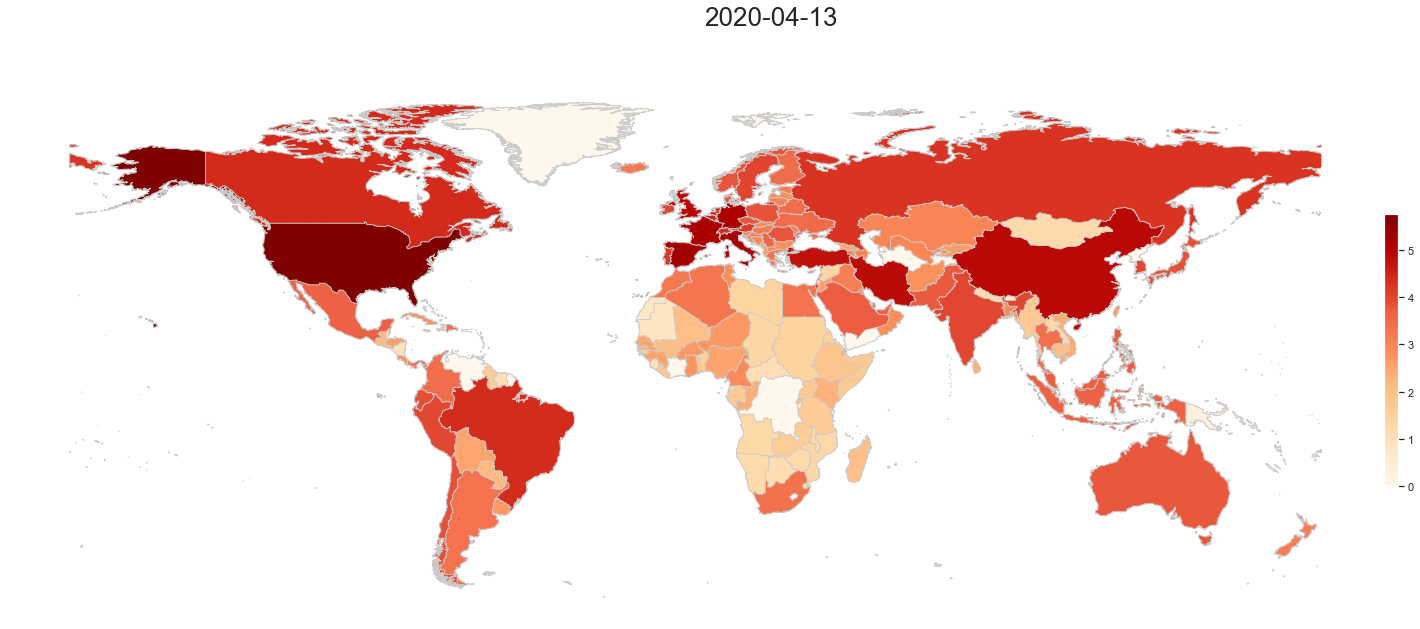

In [53]:
image_no = 0
fig, ax = plt.subplots(1, figsize=(30, 10))
variable = 'log_Confirmed'
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, pad = 0.0001, shrink=0.5)

vmin, vmax = 0, corona_df.log_Confirmed[corona_df.Date == '2020-04-13'].max()
for i in range(0, len(date_list_test)):   
    date_for_mask = date_list_test.Date.values[3]
    mask = (corona_df['Date'] == date_for_mask)
    my_map = corona_df.loc[mask]
    ax.axis('off')
    fig.suptitle(str(date_for_mask), fontsize=26, fontweight = 3)
    my_map.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
    fig.savefig('output_images/MAP_{image_no:04d}.png'.format(image_no=image_no), 
                dpi=300, bbox_inches='tight')
    image_no +=1

# ++++++++++++++++++++++++++++++++++++++++++++++++
# TWITTER
# ++++++++++++++++++++++++++++++++++++++++++++++++

In [16]:
twitter = pd.read_csv('TWITTER.csv')
twitter.head()

,Date,Hashtags,no_of_mentions,log10_mentions
0,2020-01-22,#Coronavirus,7468,3.873204
1,2020-01-22,#covid,0,0.000000
2,2020-01-22,#ncov19,0,0.000000
3,2020-01-22,#ncov2019,0,0.000000
4,2020-01-22,#virus,5662,3.752970


In [17]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 4 columns):
Date              405 non-null object
Hashtags          405 non-null object
no_of_mentions    405 non-null int64
log10_mentions    405 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 12.8+ KB


In [21]:
twitter.Date.max()

'2020-04-13'

In [40]:
selected_date_twitter = twitter.loc[twitter.Date == '2020-04-13']
selected_date_twitter

,Date,Hashtags,no_of_mentions,log10_mentions
400,2020-04-13,#Coronavirus,19331741,7.286271
401,2020-04-13,#covid,16760618,7.224290
402,2020-04-13,#ncov19,78684,4.895886
403,2020-04-13,#ncov2019,80463,4.905596
404,2020-04-13,#virus,18594724,7.269390


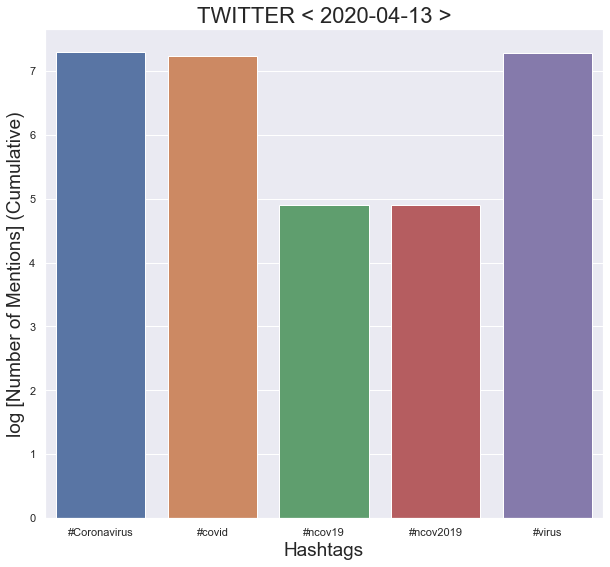

In [54]:
fig = plt.subplots(1, figsize=(10, 9))
sns.barplot(x="Hashtags", y="log10_mentions", data=selected_date_twitter)
plt.title('TWITTER < 2020-04-13 >', fontsize=22)
plt.xlabel('Hashtags', fontsize=19)
plt.ylabel('log [Number of Mentions] (Cumulative)', fontsize=19)
plt.savefig('output_images/TWITTER.png', 
            dpi=300, bbox_inches='tight')

# ++++++++++++++++++++++++++++++++++++++++++++++++
# REDDIT
# ++++++++++++++++++++++++++++++++++++++++++++++++

In [30]:
reddit = pd.read_csv("REDDIT.csv")
reddit.head()

,Date,Categories,log10_mentions
0,2020-01-20,Contro Posts,0.000000
1,2020-01-20,Avg Comments/Post,3.003461
2,2020-01-20,Avg Votes/Post,3.733037
3,2020-01-20,Avg Posts/Day,0.698970
4,2020-01-21,Contro Posts,0.301030


In [31]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 3 columns):
Date              380 non-null object
Categories        380 non-null object
log10_mentions    380 non-null float64
dtypes: float64(1), object(2)
memory usage: 9.0+ KB


In [55]:
selected_date_reddit = reddit.loc[reddit.Date == '2020-04-13']
selected_date_reddit

,Date,Categories,log10_mentions
336,2020-04-13,Contro Posts,4.201069
337,2020-04-13,Avg Comments/Post,4.744801
338,2020-04-13,Avg Votes/Post,5.811492
339,2020-04-13,Avg Posts/Day,3.189771


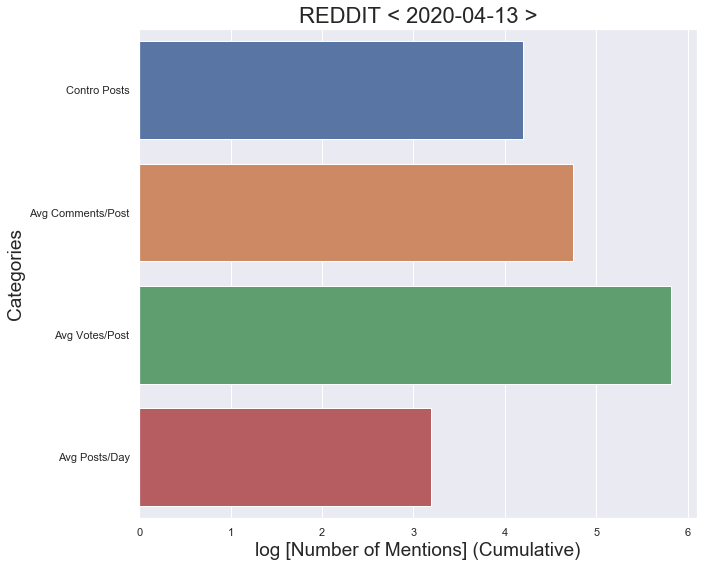

In [60]:
fig = plt.subplots(1, figsize=(10, 9))
sns.barplot(x="log10_mentions", y="Categories", data = selected_date_reddit)
plt.title('REDDIT < 2020-04-13 >', fontsize=22)
plt.ylabel('Categories', fontsize=19)
plt.xlabel('log [Number of Mentions] (Cumulative)', fontsize=19)
plt.savefig('output_images/REDDIT.png', 
            dpi=300, bbox_inches='tight')

# ++++++++++++++++++++++++++++++++++++++++++++++++
# STOCK MARKET
# ++++++++++++++++++++++++++++++++++++++++++++++++

In [32]:
stock = pd.read_csv("STOCK_MARKET.csv")
stock.head()

,Date,GM,JHN,JCB,ALB,DSN,ATT,AA
0,2020-01-01,36.37,145.10,89.70,71.61,143.67,39.01,28.20
1,2020-01-02,37.00,145.87,89.90,73.50,145.29,39.16,28.98
2,2020-01-03,36.73,143.50,89.13,71.41,146.40,38.58,28.27
3,2020-01-04,36.73,143.50,89.13,71.41,146.40,38.58,28.27
4,2020-01-05,36.73,143.50,89.13,71.41,146.40,38.58,28.27


In [33]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 8 columns):
Date    114 non-null object
GM      114 non-null float64
JHN     114 non-null float64
JCB     114 non-null float64
ALB     114 non-null float64
DSN     114 non-null float64
ATT     114 non-null float64
AA      114 non-null float64
dtypes: float64(7), object(1)
memory usage: 7.2+ KB


In [62]:
stock_columns = ['GM', 'JHN', 'JCB', 'ALB', 'DSN', 'ATT', 'AA']

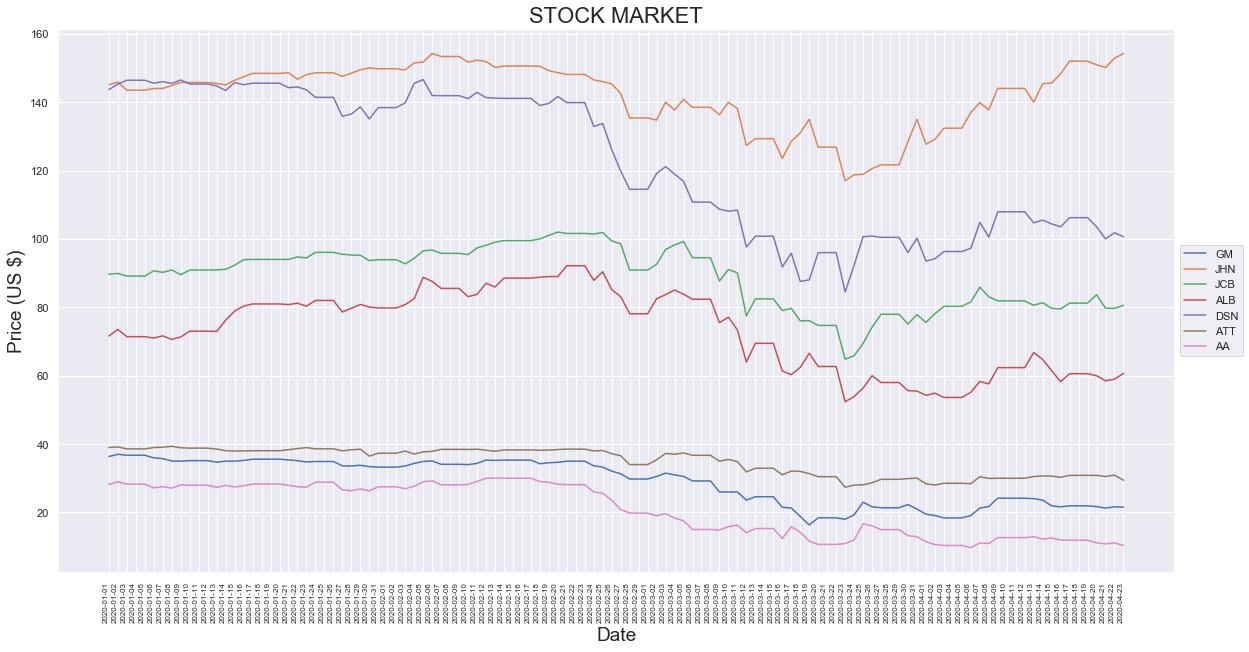

In [76]:
fig, ax = plt.subplots(1, figsize=(20, 10))
sns.lineplot(x='Date', y='value', hue='variable',
             data=pd.melt(stock, ['Date']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=stock_columns)
plt.title('STOCK MARKET', fontsize=22)
plt.ylabel('Price (US $)', fontsize=19)
plt.xlabel('Date', fontsize=19)
# ax.get_xaxis().set_visible(False)
ax.set_xticklabels(labels=stock.Date, rotation=90, ha='right', fontdict = {'fontsize': 8, 'fontweight' : 3})
plt.savefig('output_images/STOCK_MARKET.png', 
            dpi=300, bbox_inches='tight')

# ++++++++++++++++++++++++++++++++++++++++++++++++
# FINAL VISUALISATIONS
# ++++++++++++++++++++++++++++++++++++++++++++++++

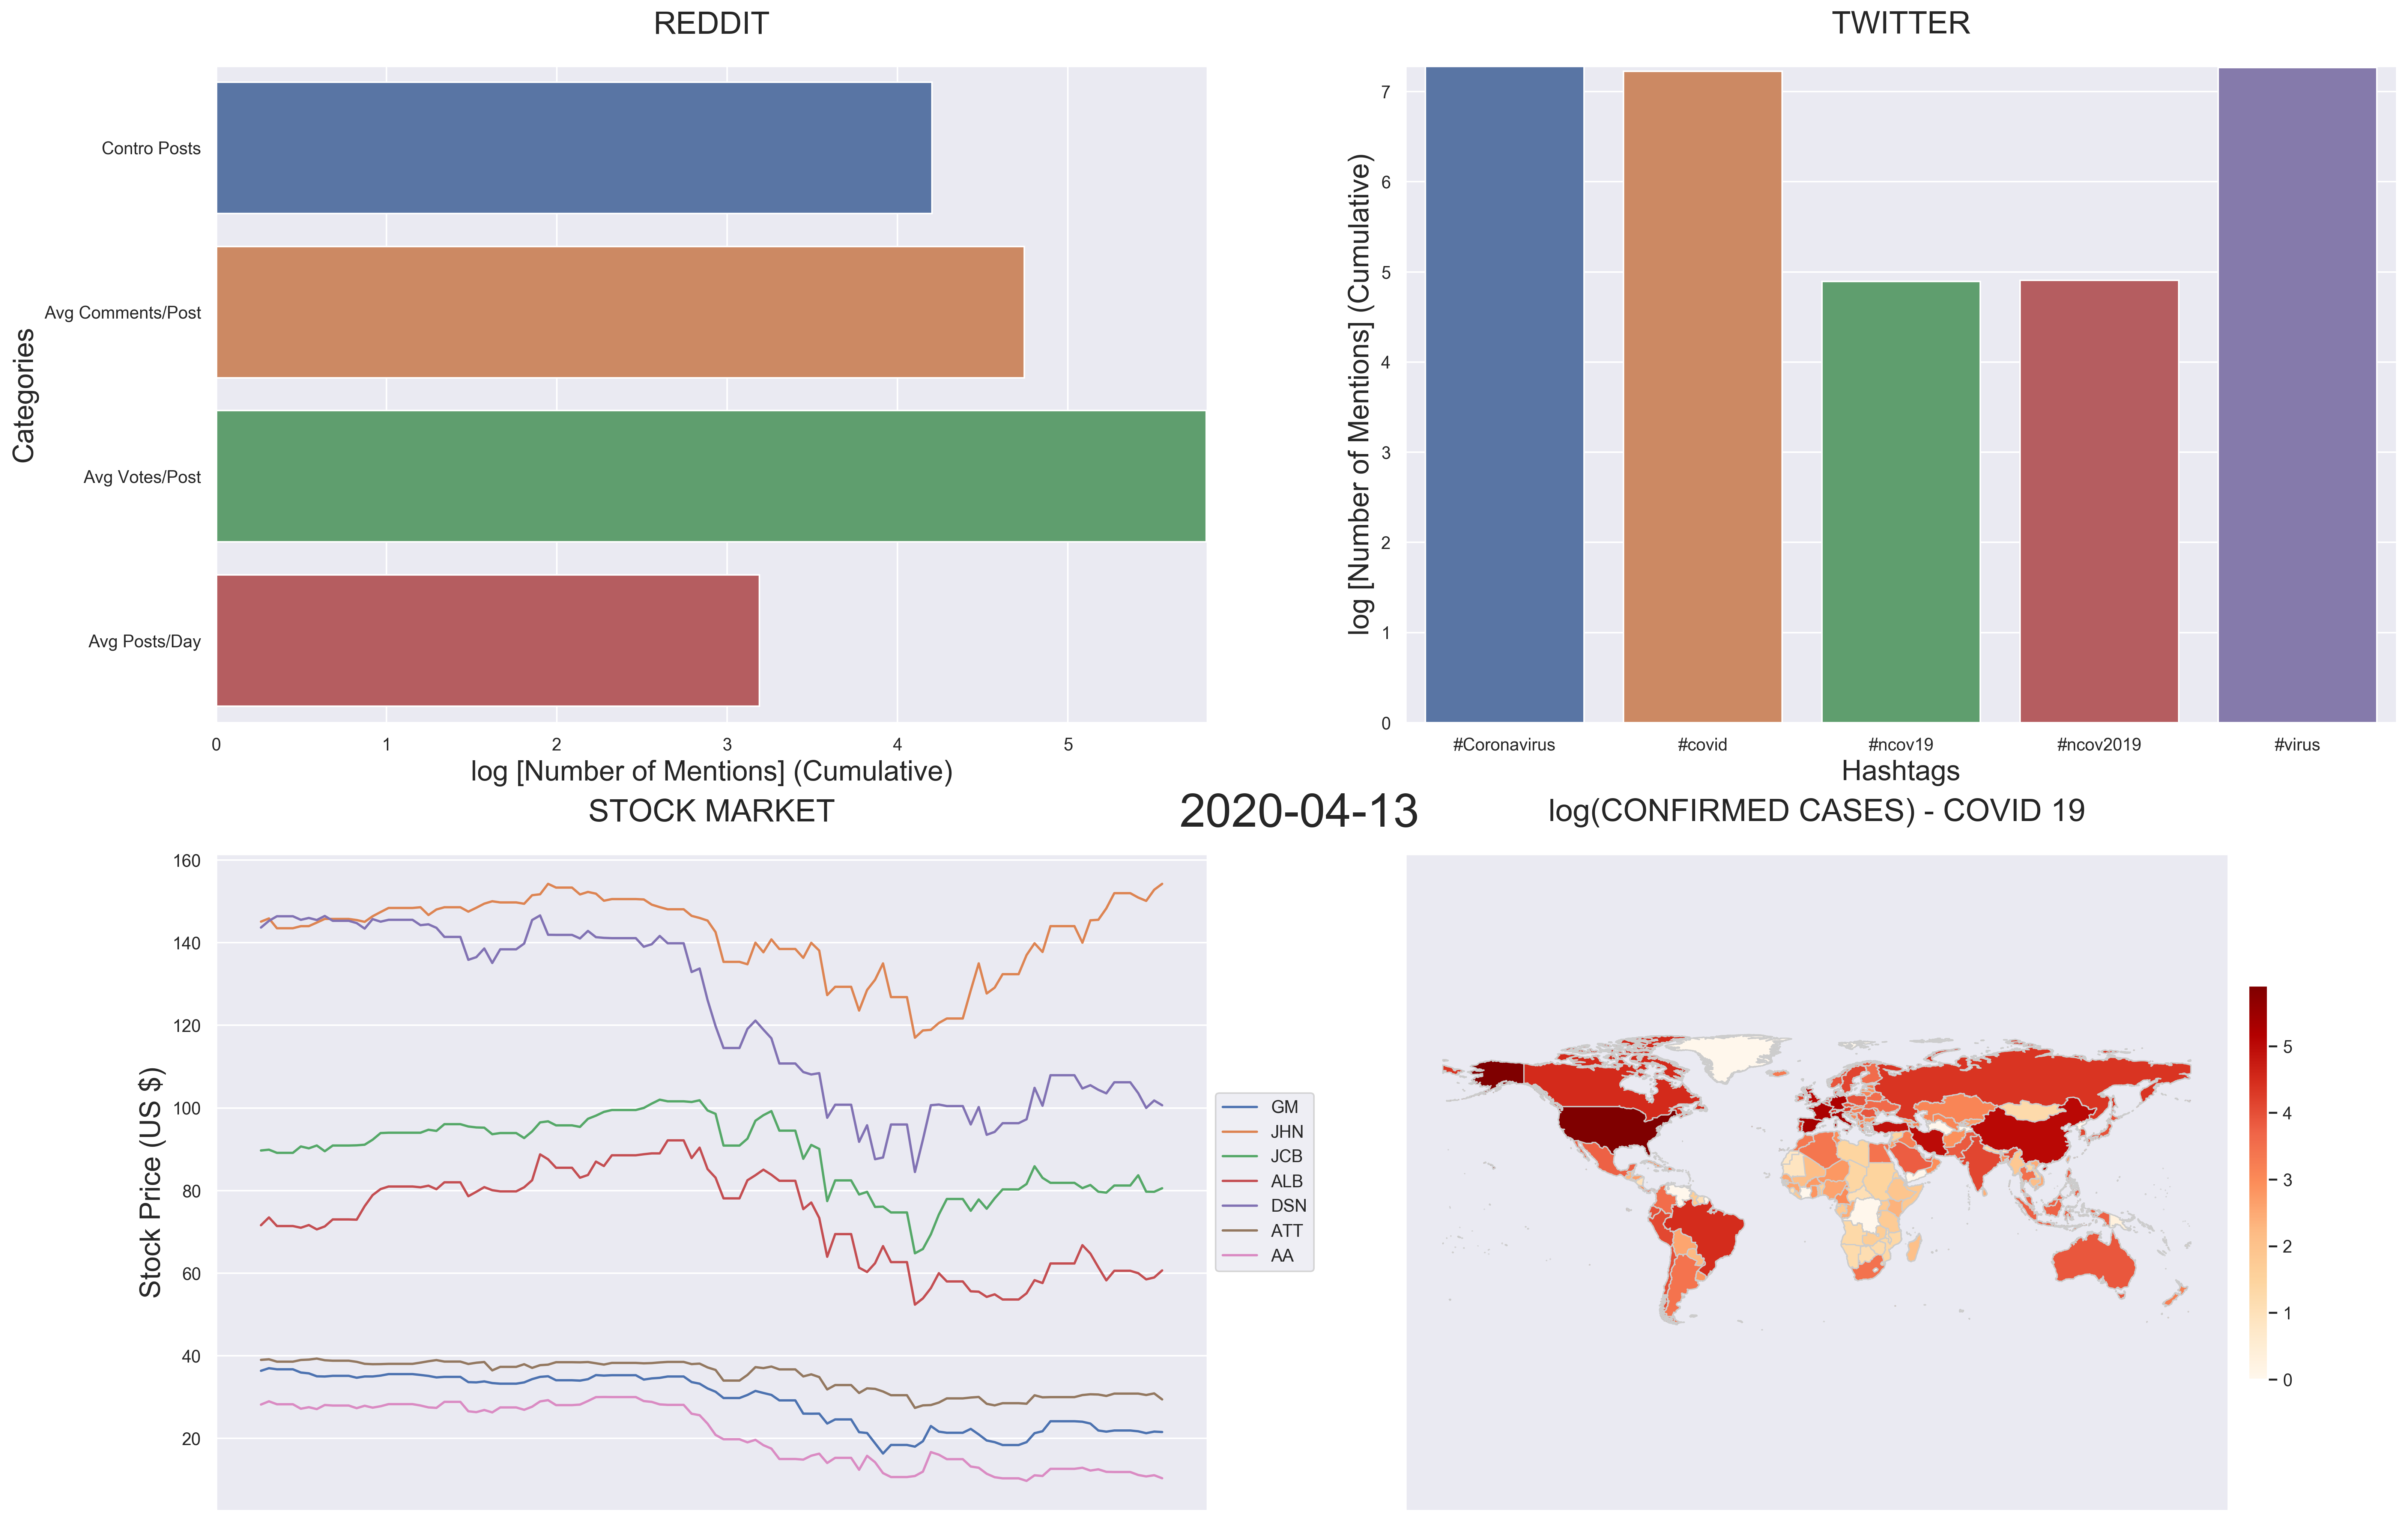

In [77]:
path = 'output_images/'
image_no = 0
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(25, 17), dpi=300)

ax1_min, ax1_max = 0.0, reddit.log10_mentions.max()
ax2_min, ax2_max = 0.0, twitter.log10_mentions.max()

vmin, vmax = 0, corona_df.log_Confirmed[corona_df.Date == '2020-04-21'].max()
variable = 'log_Confirmed'
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, ax = ax4, orientation = 'vertical', shrink=0.6, pad=0.02)

ax1.set_title("REDDIT\n", fontdict = {'fontsize': 20, 'fontweight' : 4}, pad=0.02)
ax2.set_title("TWITTER\n", fontdict = {'fontsize': 20, 'fontweight' : 4}, pad=0.02)
ax3.set_title("\nSTOCK MARKET\n", fontdict = {'fontsize': 20, 'fontweight' : 4}, pad=0.02)
ax4.set_title("\nlog(CONFIRMED CASES) - COVID 19\n", fontdict = {'fontsize': 20, 'fontweight' : 4}, pad=0.02)

ax1.set_xlim([ax1_min, ax1_max])
ax2.set_ylim([ax2_min, ax2_max])

sns.lineplot(x='Date', y='value', hue='variable',
             data=pd.melt(stock, ['Date']), ax=ax3)
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=stock_columns)



for i in range(0, len(date_list_test)):   
    date_for_mask = date_list_test.Date.values[i]
    
    mask_twitter = (twitter['Date'] == date_for_mask)
    mask_reddit = (reddit['Date'] == date_for_mask)
    mask_stock = (stock['Date'] == date_for_mask)
    mask_map = (corona_df['Date'] == date_for_mask)
    
    my_reddit = reddit.loc[mask_reddit]
    my_twitter = twitter.loc[mask_twitter]
    my_stock = stock.loc[mask_stock]
    my_map = corona_df.loc[mask_map]
    
    sns.barplot(x="log10_mentions", y="Categories", data = my_reddit, ax=ax1)    
    ax1.set_ylabel('Categories', fontdict = {'fontsize': 18, 'fontweight' : 3})
    ax1.set_xlabel('log [Number of Mentions] (Cumulative)', fontdict = {'fontsize': 18, 'fontweight' : 3})
    
    sns.barplot(x="Hashtags", y="log10_mentions", data = my_twitter, ax=ax2)
    ax2.set_ylabel('log [Number of Mentions] (Cumulative)', fontdict = {'fontsize': 18, 'fontweight' : 3})
    ax2.set_xlabel('Hashtags', fontdict = {'fontsize': 18, 'fontweight' : 3})
    
    ax3_vline = ax3.axvline(date_for_mask, c='k', lw=2.0)
    ax3.get_xaxis().set_visible(False)
    ax3.set_ylabel('Stock Price (US $)', fontdict = {'fontsize': 18, 'fontweight' : 3})
    ax3.set_xlabel('Date', fontdict = {'fontsize': 18, 'fontweight' : 3})
    
    ax4.get_xaxis().set_visible(False)
    ax4.get_yaxis().set_visible(False)
    ax4.axis('equal')
    my_map.plot(column=variable, cmap='OrRd', 
                linewidth=0.8, ax=ax4, edgecolor='0.8', figsize=(30,20)
                )
    fig.suptitle(str(date_for_mask), fontsize= 30, fontweight= 10, x=0.51, y=0.5)
    fig.savefig(os.path.join(path, 'image_{image_no:04d}.png'.format(image_no=image_no)), 
                dpi=300, bbox_inches='tight')
    ax3_vline.remove()
    image_no +=1

# ++++++++++++++++++++++++++++++++++++++++++++++++
# EXPORTING VIDEO
# ++++++++++++++++++++++++++++++++++++++++++++++++

In [78]:
images_path = "output_images/"
sp.call([
        'ffmpeg',
        '-y',
        '-r', '2',           #frame rate: 1/5 for 5 images in 1 sec, 5 for 1 image for 5 secs. 1 for 1 image for 1 sec
        '-f', 'image2',
        '-s', '1024x768',
        '-i', os.path.join(images_path, 'image_%04d.png'),
        '-vcodec', 'libx264',
        '-crf',  '25',
        '-pix_fmt', 'yuv420p',
        os.path.join(images_path, 'video.mp4')
    ])

0